In [1]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import os
import pandas as pd
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.decomposition import PCA, FastICA, SparsePCA, NMF
from sklearn.metrics import roc_auc_score as roc, mean_squared_error as mse
from sklearn.metrics import f1_score
import sys
print("Python version: {}".format(sys.version_info))

Python version: sys.version_info(major=3, minor=10, micro=8, releaselevel='final', serial=0)


In [2]:
import contextualized
import scContextualized
from scContextualized import ContextualizedRegressor, ContextualizedClassifier
from scContextualized.plot_utils import *

In [3]:
n_samples = 1000
n_context = 2
n_observed = 3
n_outcomes = 1
C = np.random.normal(-1, 1, size=(n_samples, n_context))
X = np.random.normal(-1, 1, size=(n_samples, n_observed))
phi = np.random.uniform(-10, 10, size=(n_context, n_observed, n_outcomes))
beta = np.tensordot(C, phi, axes=1)
Y = np.array([np.tensordot(X[i], beta[i], axes=1) for i in range(n_samples)])
Y = np.round(utils.sigmoid(Y))

C_train, C_test, X_train, X_test, Y_train, Y_test = train_test_split(C, X, Y)
C_names = ['Context {}'.format(i) for i in range(n_context)]
C_df = pd.DataFrame(C, columns=C_names)
X_names = ['Predictor {}'.format(i) for i in range(n_observed)]

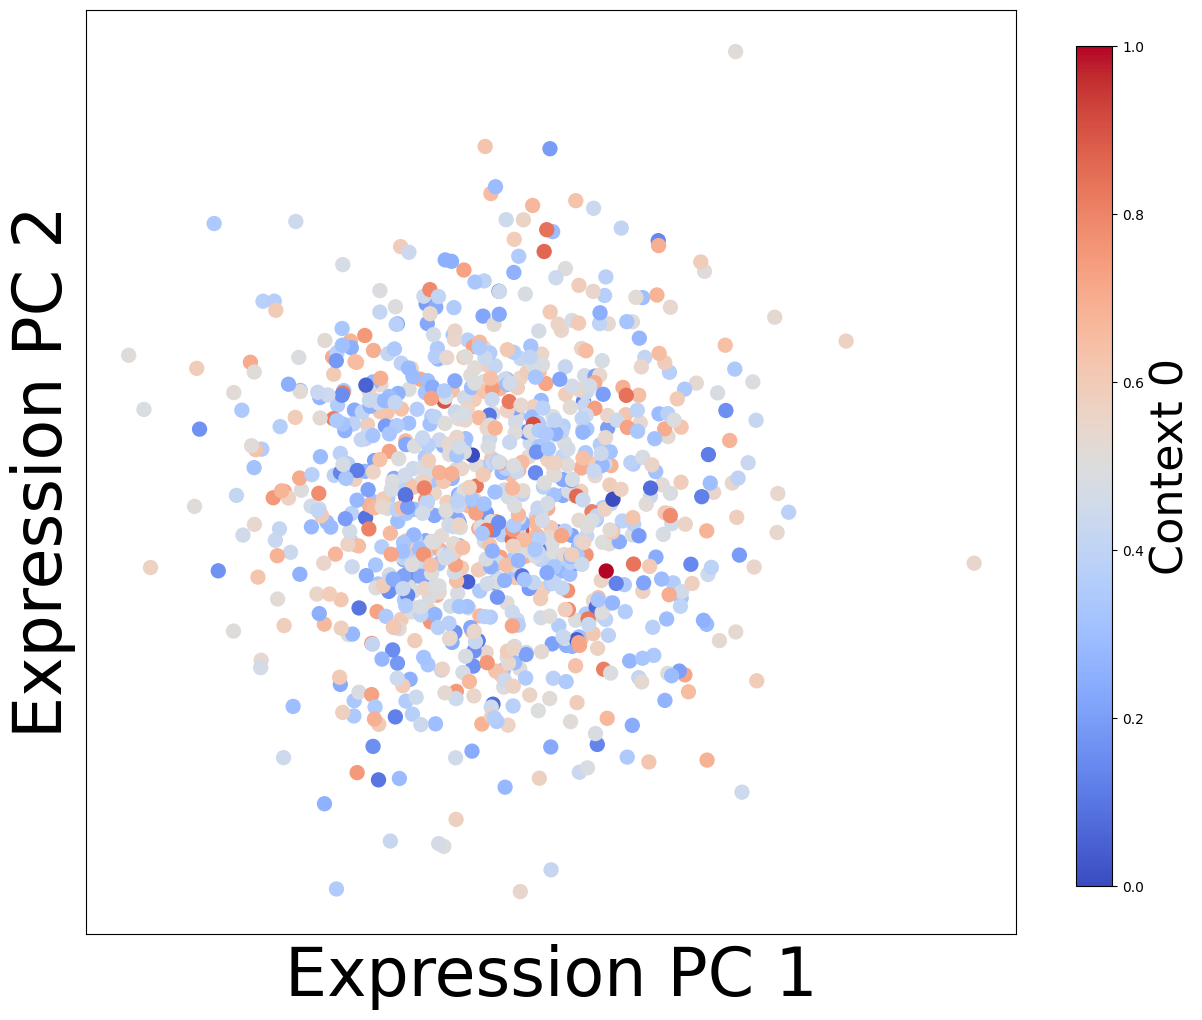

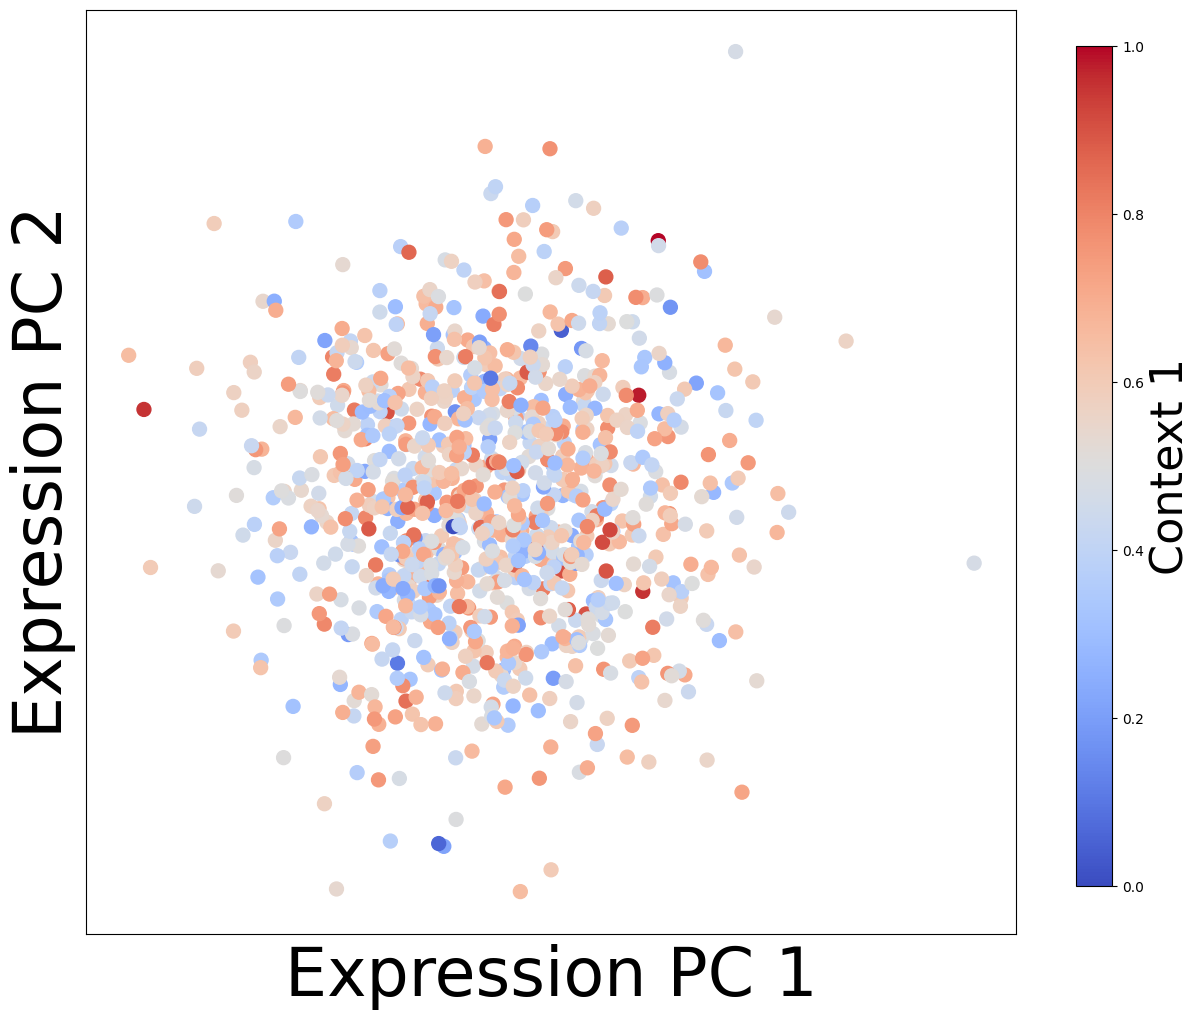

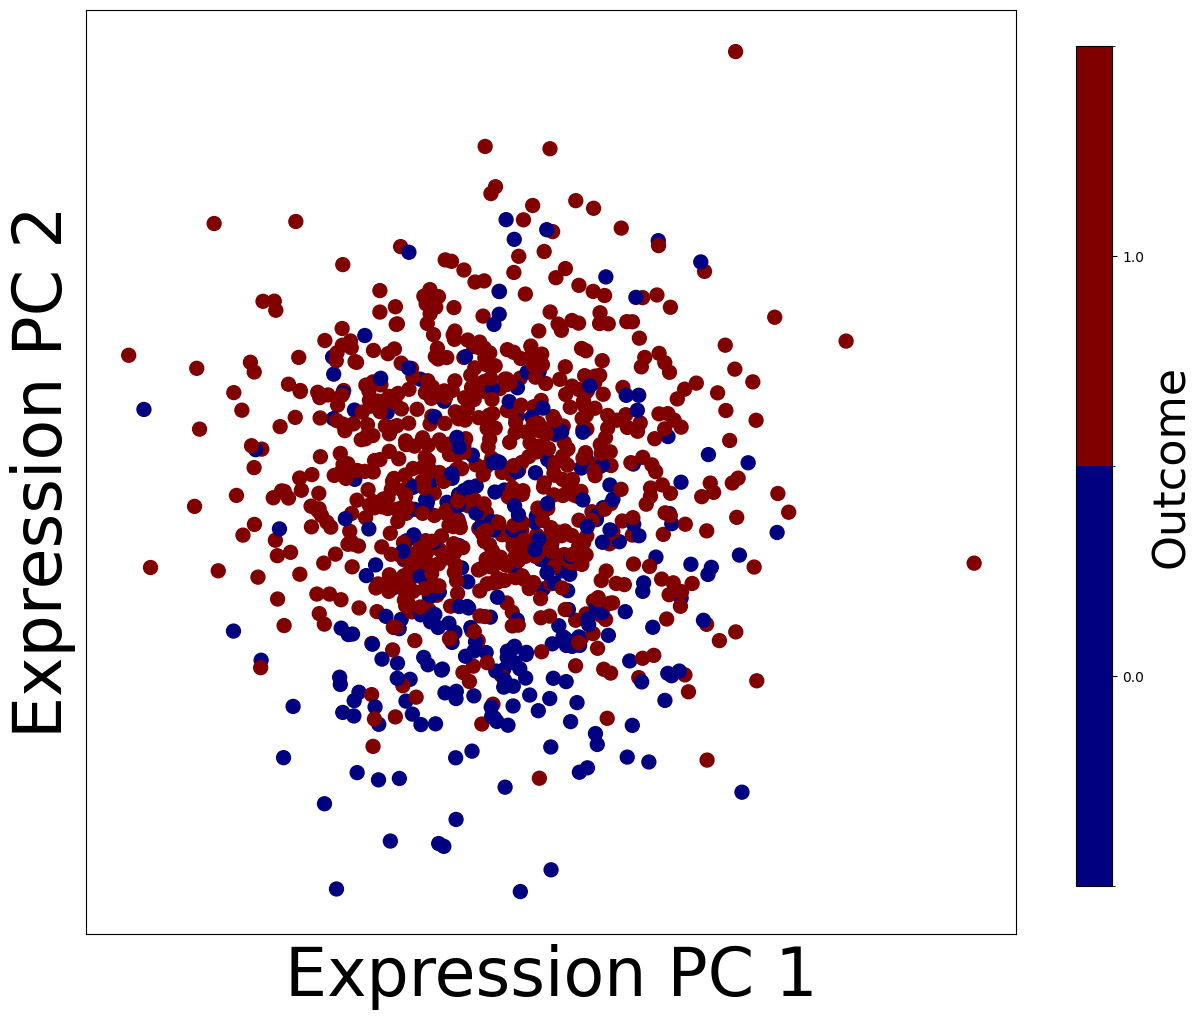

In [4]:
pc = PCA(n_components=2)
X_small = pc.fit_transform(X)
plot_embedding_for_all_covars(X_small, C_df)
plot_embedding_for_all_covars(X_small, pd.DataFrame(Y, columns=['Outcome']))

In [5]:
model = ContextualizedClassifier(num_archetypes=16, encoder_type='ngam', 
                                   encoder_kwargs={'width': 1, 'layers': 1},
                                   alpha=0., val_split=0.2)
model.fit(C_train, X_train, Y_train,
          max_epochs=1, n_bootstraps=3, learning_rate=1e-4)

Received unknown keyword argument alpha, probably ignoring.
Received unknown keyword argument val_split, probably ignoring.


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/lib/python3.10/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(

  | Name      | Type             | Params
-----------------------------------------------
0 | metamodel | SubtypeMetamodel | 132   
-----------------------------------------------
132       Trainable params
0         Non-trainable params
132       Total params
0.001     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/opt/homebrew/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:236: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 10 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/opt/homebrew/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:236: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 10 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=1` reached.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name      | Type             | Params
-----------------------------------------------
0 | metamodel | SubtypeMetamodel | 132   
-----------------------------------------------
132       Trainable params
0         Non-trainable params
132       Total params
0.001     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=1` reached.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name      | Type             | Params
-----------------------------------------------
0 | metamodel | SubtypeMetamodel | 132   
-----------------------------------------------
132       Trainable params
0         Non-trainable params
132       Total params
0.001     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=1` reached.


In [6]:
preds = model.predict_proba(C_train, X_train)[:, :, 1]
preds_test = model.predict_proba(C_test, X_test)[:, :, 1]

train_roc = roc(Y_train[:, 0], preds[:, 0])
test_roc  = roc(Y_test[:, 0], preds_test[:, 0])
print(f"Train: {train_roc:.2f}, Test: {test_roc:.2f}")

/opt/homebrew/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:236: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 10 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 600it [00:00, ?it/s]

/opt/homebrew/lib/python3.10/site-packages/pytorch_lightning/loops/epoch/prediction_epoch_loop.py:174: UserWarning: Lightning couldn't infer the indices fetched for your dataloader.
  warning_cache.warn("Lightning couldn't infer the indices fetched for your dataloader.")


Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Train: 0.72, Test: 0.71


/opt/homebrew/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:236: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 10 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

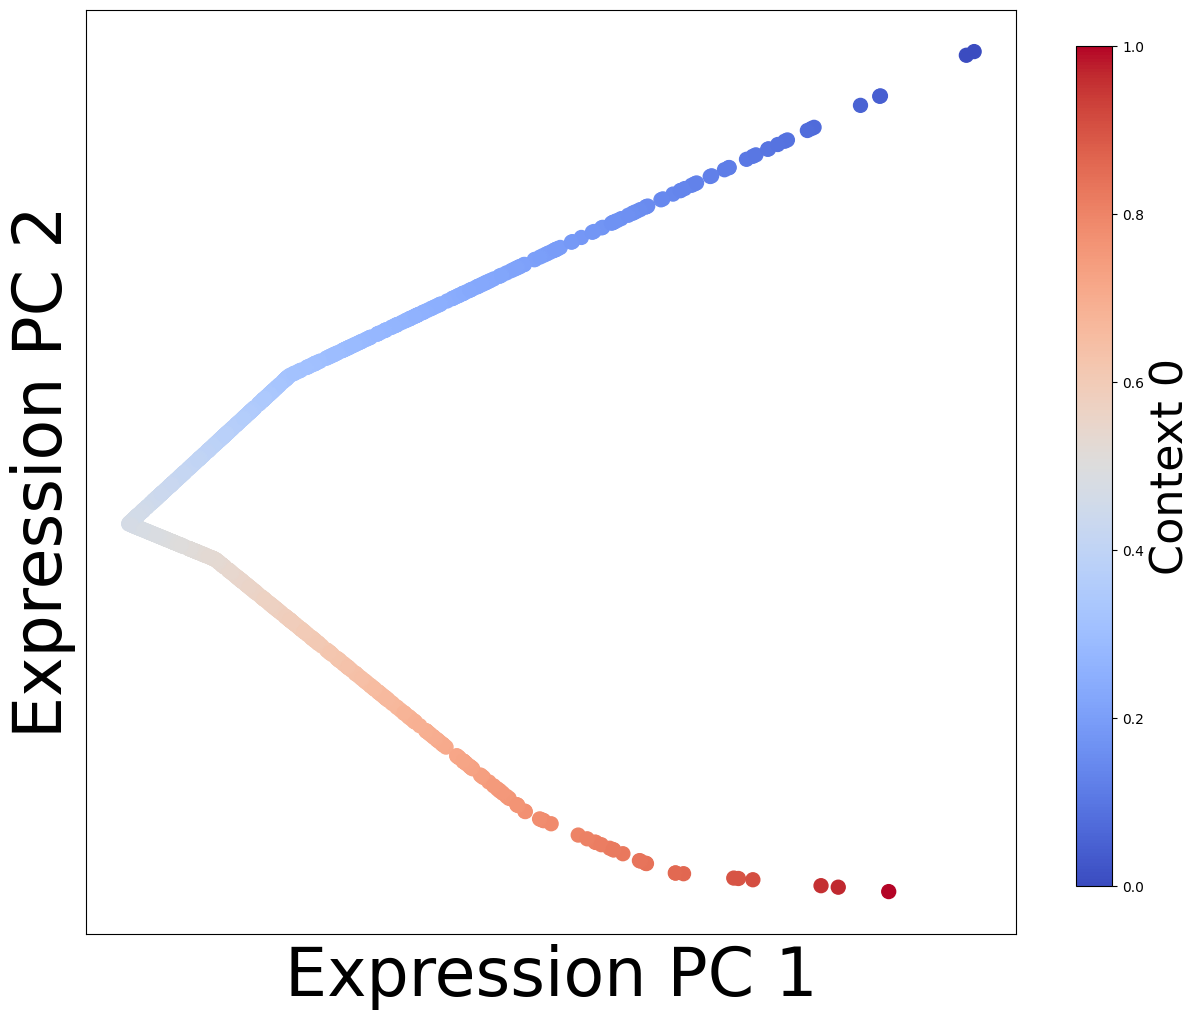

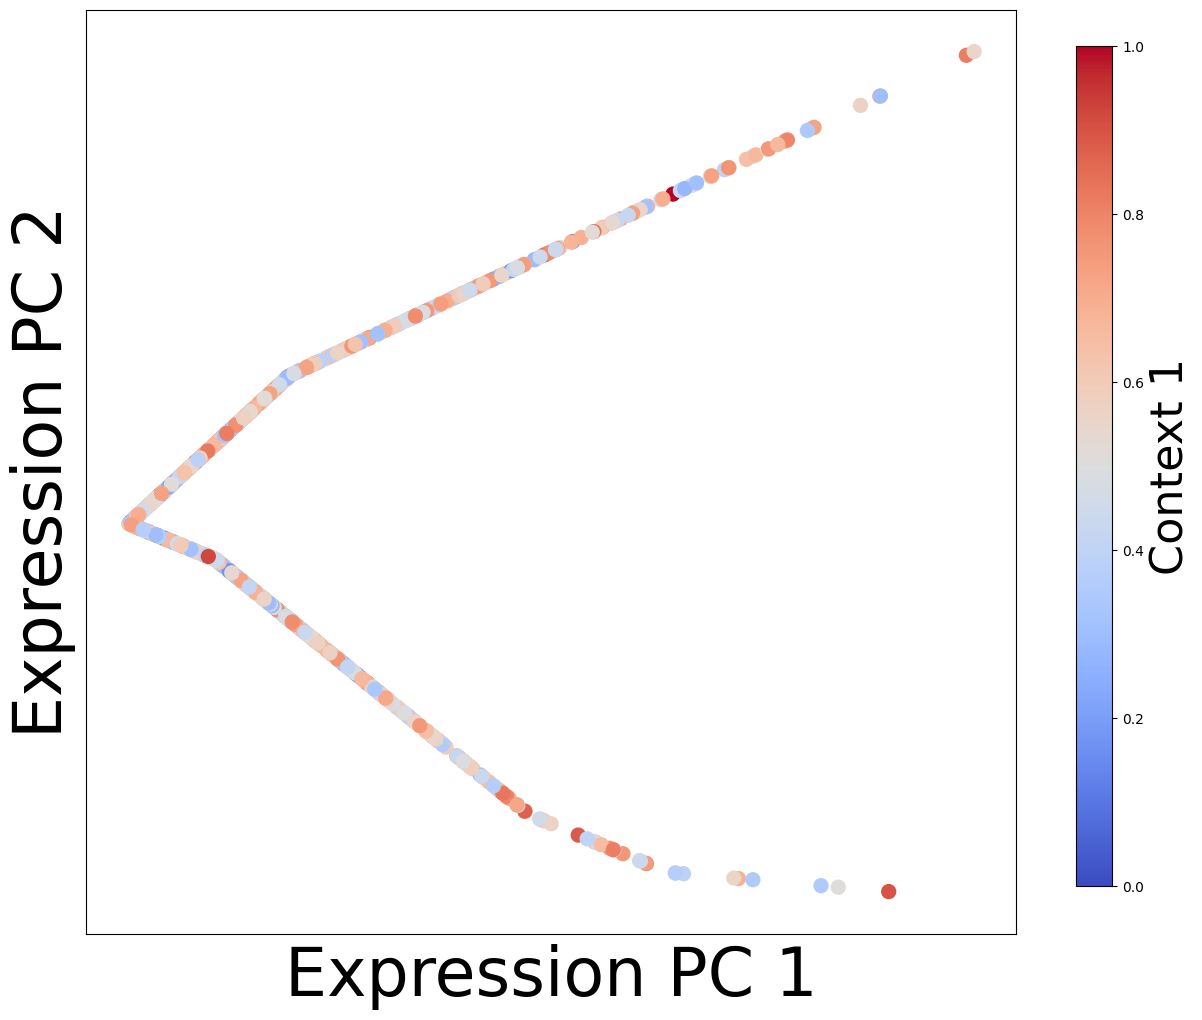

In [7]:
# Plot Embeddings of Models.

betas, mus = model.predict_params(C)
reps = pc.transform(np.squeeze(betas))
plot_embedding_for_all_covars(reps, C_df)

Estimating Homogeneous Contextual Effects.
Assuming classification and exponentiating odds ratios.
            If this is wrong, use classification=False parameter.
Generating visualizing datapoints by assuming the encoder is
            an additive model and thus doesn't require sampling on a manifold.
            If the encoder has interactions, please supply C_vis so that we
            can visualize these effects on the correct data manifold.


Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

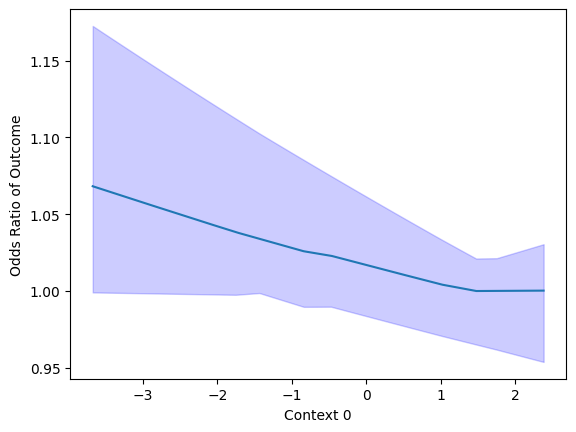

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

In [11]:

plot_homogeneous_context(model.predict_params, C_df, min_effect_size=1.01, 
                         ylabel="Odds Ratio of Outcome",
                         encoders=None, C_means=None, C_stds=None, classification=True)

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

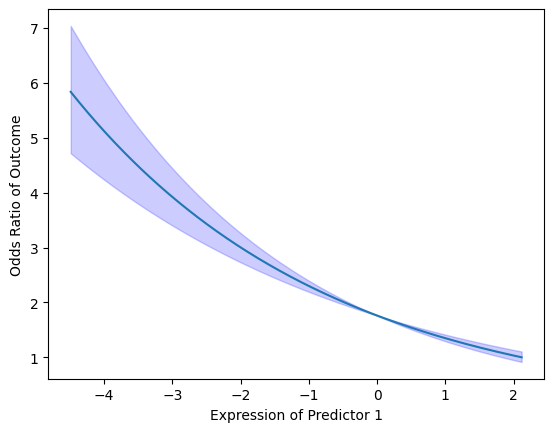

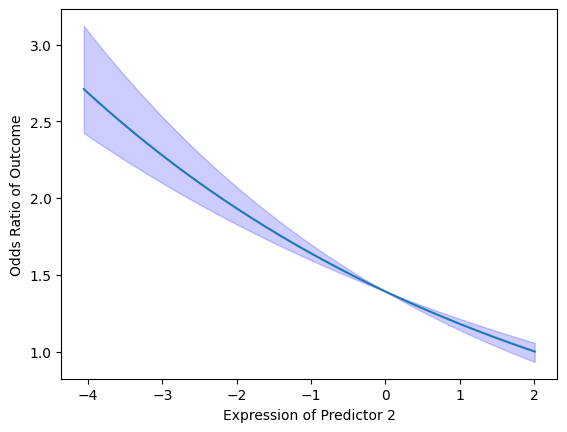

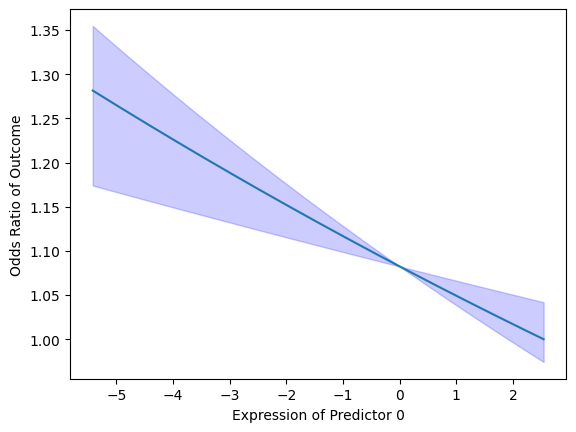

In [12]:
plot_homogeneous_tx(model.predict_params, C_df, X, X_names,
                    ylabel="Odds Ratio of Outcome", min_effect_size=1.1,
                   classification=True)

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

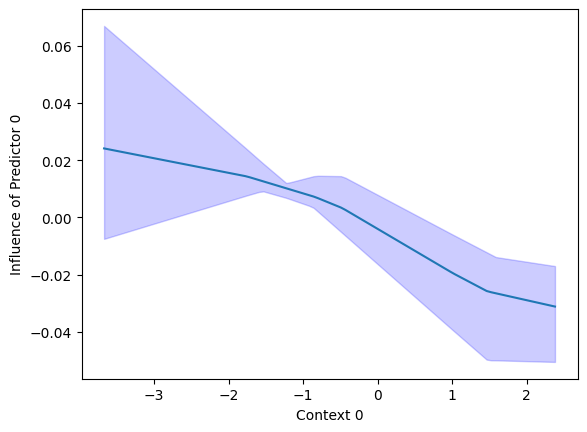

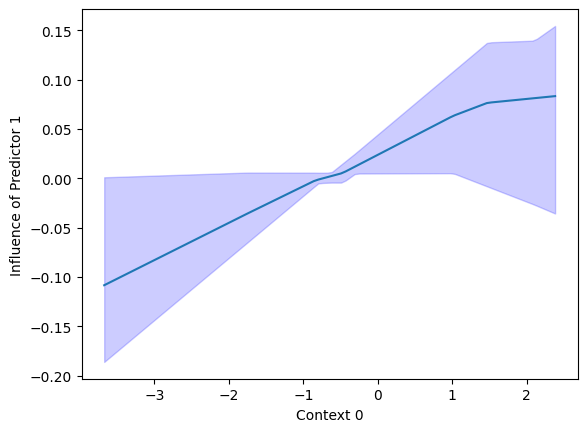

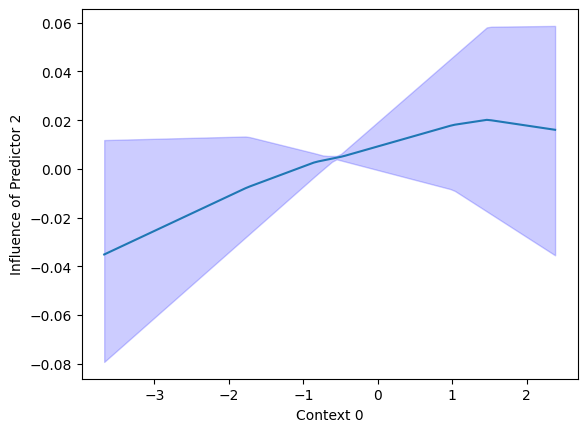

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

Predicting: 600it [00:00, ?it/s]

In [13]:
plot_heterogeneous(model.predict_params, C_df, X_train, encoders=None,
                   C_means=None, C_stds=None, X_names=X_names,
                   y_prefix="Influence of", min_effect_size=0.003, n_vis=100)
